In [3]:
from pandas import read_csv
soc_df=read_csv('combined_data_simulink.csv')

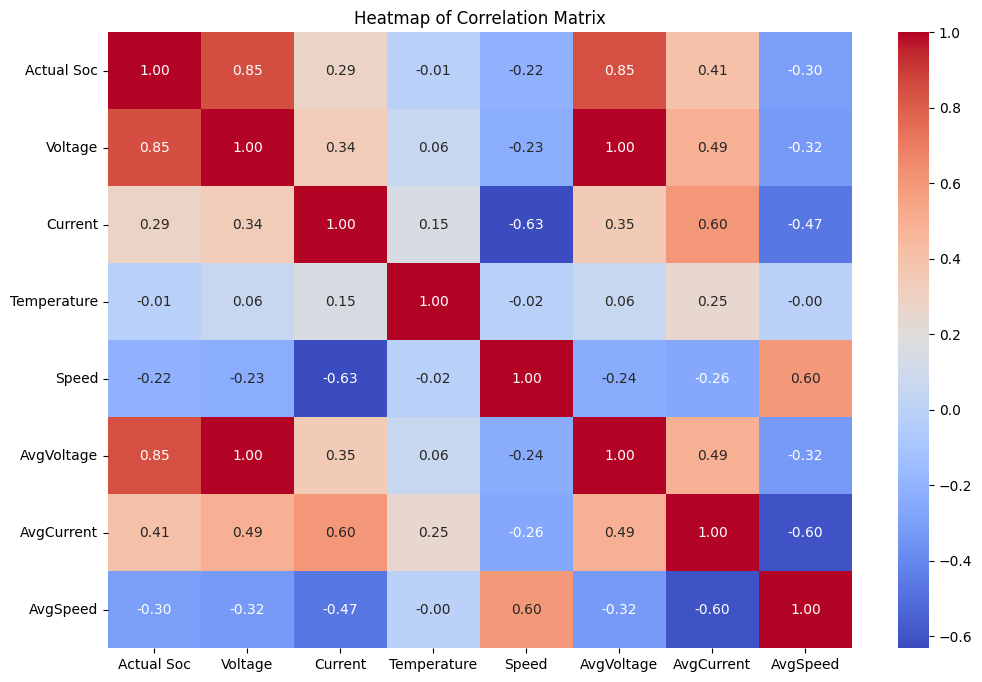

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# Create a heatmap of the correlation matrix
correlation_matrix = soc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# the negative relation with ACTUAL SOC -- Temperature,Speed,AvgSpeed thus we'll remove these features

In [8]:
soc_df.drop(columns=['Temperature','Speed','AvgSpeed'],inplace=True)

In [13]:
soc_df.head(12)

Actual Soc   Voltage   Current  AvgVoltage  AvgCurrent
0     1.000000  0.988833  0.313664    0.988833    0.313664
1     0.997976  0.972491  0.666636    0.981730    0.506703
2     0.992862  0.953467  0.900673    0.972231    0.646798
3     0.985845  0.940777  1.000000    0.963681    0.750273
4     0.978965  0.941716  0.878823    0.957913    0.797193
5     0.973403  0.948216  0.779898    0.954785    0.812256
6     0.970382  0.967589  0.430510    0.950098    0.822975
7     0.968203  0.967012  0.602122    0.951678    0.769185
8     0.965630  0.967561  0.517660    0.955788    0.686355
9     0.962733  0.961921  0.647560    0.960865    0.616798
10    0.959499  0.961319  0.591040    0.963937    0.575043
11    0.956025  0.956851  0.682213    0.964325    0.588151

In [12]:
soc_df.to_csv('updated_soc.csv',index=False)

In [ ]:
################# all models to predict soc ##################

In [17]:
############################### complete dataset prediction -- important
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import joblib

# Load your DataFrame (soc_df)
soc_df = pd.read_csv('updated_soc.csv')

# Define features (X) and the target variable (y)
X = soc_df[['Voltage', 'AvgVoltage', 'AvgCurrent', 'Current']]
y = soc_df['Actual Soc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store results
results = {'Model': [], 'R2 Score': [], 'MSE': []}

# Models to iterate over
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost Regression', XGBRegressor(random_state=42)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42))
]

# Loop through models
for model_name, model in models:
    model.fit(X_train, y_train)
    model_predictions = model.predict(X_test)
    model_r2 = r2_score(y_test, model_predictions)
    model_mse = mean_squared_error(y_test, model_predictions)
    results['Model'].append(model_name)
    results['R2 Score'].append(model_r2)
    results['MSE'].append(model_mse)
    
    # Save the trained model to a file
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Load the saved model
    loaded_model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')

    # Make predictions on the original DataFrame
    model_predictions = loaded_model.predict(X)

    # Add the predictions to the original DataFrame
    soc_df[f'{model_name} Predictions'] = model_predictions

# Save results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('regression_results.csv', index=False)

# Save the DataFrame with predictions
soc_df.to_csv('soc_with_predictions.csv', index=False)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 35200, number of used features: 4
[LightGBM] [Info] Start training from score 0.276517


In [19]:
soc_df.head(12)

Actual Soc   Voltage   Current  AvgVoltage  AvgCurrent  \
0     1.000000  0.988833  0.313664    0.988833    0.313664   
1     0.997976  0.972491  0.666636    0.981730    0.506703   
2     0.992862  0.953467  0.900673    0.972231    0.646798   
3     0.985845  0.940777  1.000000    0.963681    0.750273   
4     0.978965  0.941716  0.878823    0.957913    0.797193   
5     0.973403  0.948216  0.779898    0.954785    0.812256   
6     0.970382  0.967589  0.430510    0.950098    0.822975   
7     0.968203  0.967012  0.602122    0.951678    0.769185   
8     0.965630  0.967561  0.517660    0.955788    0.686355   
9     0.962733  0.961921  0.647560    0.960865    0.616798   
10    0.959499  0.961319  0.591040    0.963937    0.575043   
11    0.956025  0.956851  0.682213    0.964325    0.588151   

    Linear Regression Predictions  Decision Tree Regression Predictions  \
0                        0.598748                              0.936825   
1                        0.586824                              0.906894   
2                        0.571687                              0.992862   
3                        0.559055                              0.985845   
4                        0.553040                              0.763554   
5                        0.554967                              0.973403   
6                        0.559067                              0.970382   
7                        0.569826                              0.969215   
8                        0.571221                              0.965630   
9                        0.574949                              0.962733   
10                       0.573772                              0.959499   
11                       0.572395                              0.956025   

    Random Forest Regression Predictions  SVR Predictions  \
0                               0.930812         0.829913   
1                               0.921066         0.875979   
2                               0.976404         0.726493   
3                               0.964141         0.644225   
4                               0.884114         0.655027   
5                               0.902433         0.662851   
6                               0.922761         0.603188   
7                               0.907542         0.703547   
8                               0.888091         0.750399   
9                               0.903284         0.786708   
10                              0.918555         0.794678   
11                              0.922446         0.780748   

    XGBoost Regression Predictions  LightGBM Regression Predictions  \
0                         0.935847                         0.938383   
1                         0.929466                         0.916528   
2                         0.920702                         0.878831   
3                         0.988939                         0.922937   
4                         0.881125                         0.844315   
5                         0.964472                         0.823338   
6                         0.971981                         0.794350   
7                         0.847847                         0.782014   
8                         0.792971                         0.795661   
9                         0.810629                         0.811664   
10                        0.824981                         0.828000   
11                        0.847332                         0.833920   

    Neural Network Regression Predictions  
0                                0.729933  
1                                0.779229  
2                                0.679932  
3                                0.611536  
4                                0.618162  
5                                0.631091  
6                                0.676663  
7                                0.686314  
8                                0.717873  
9                                0.728586  
10                 

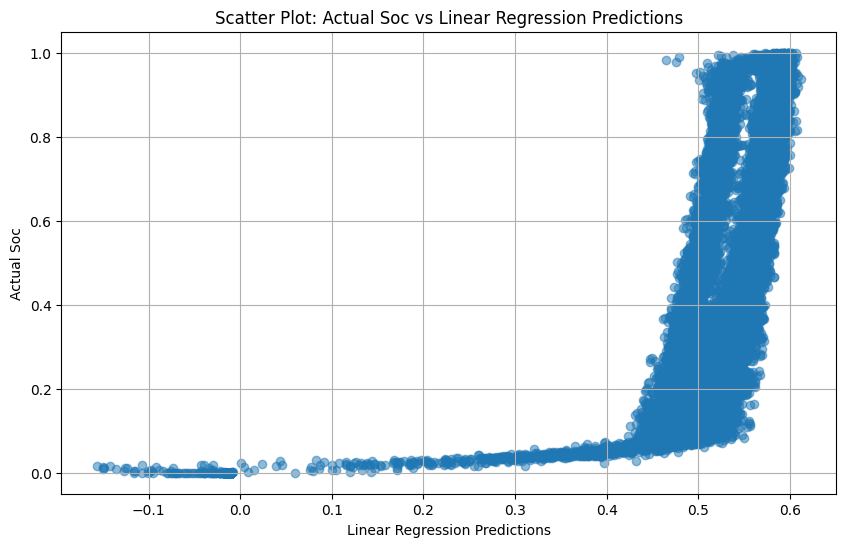

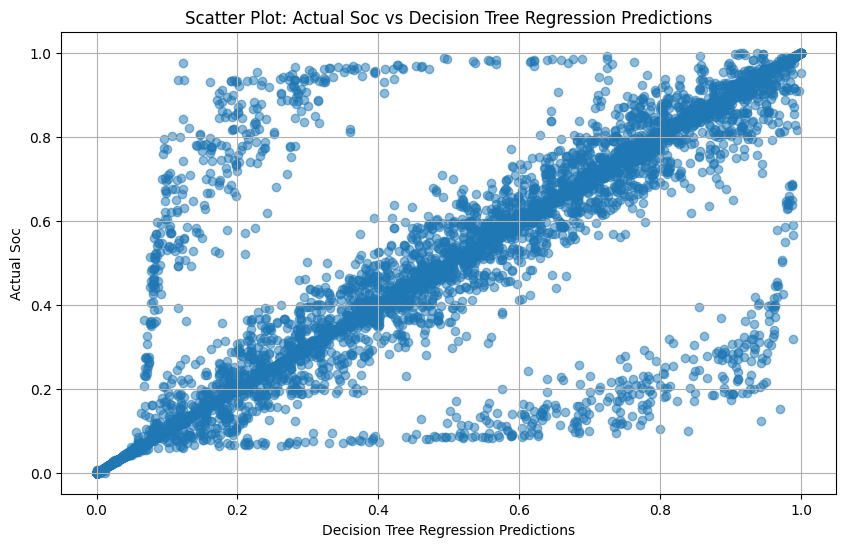

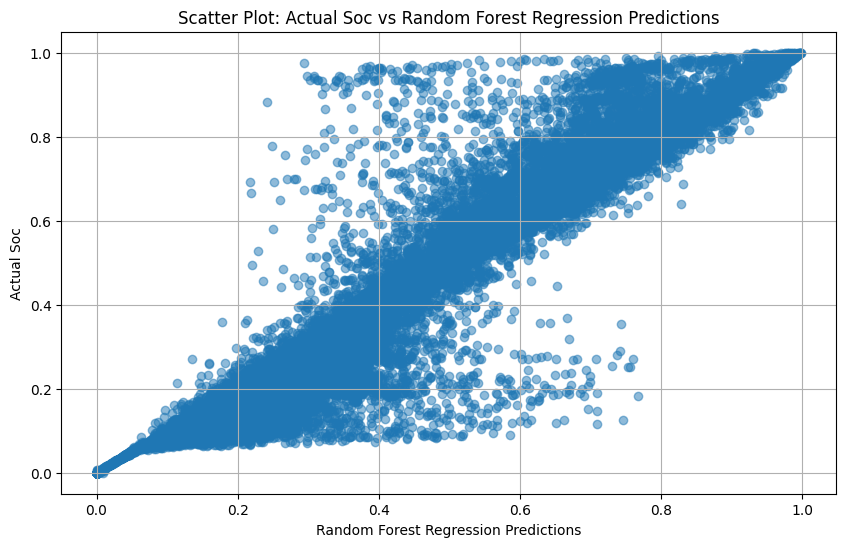

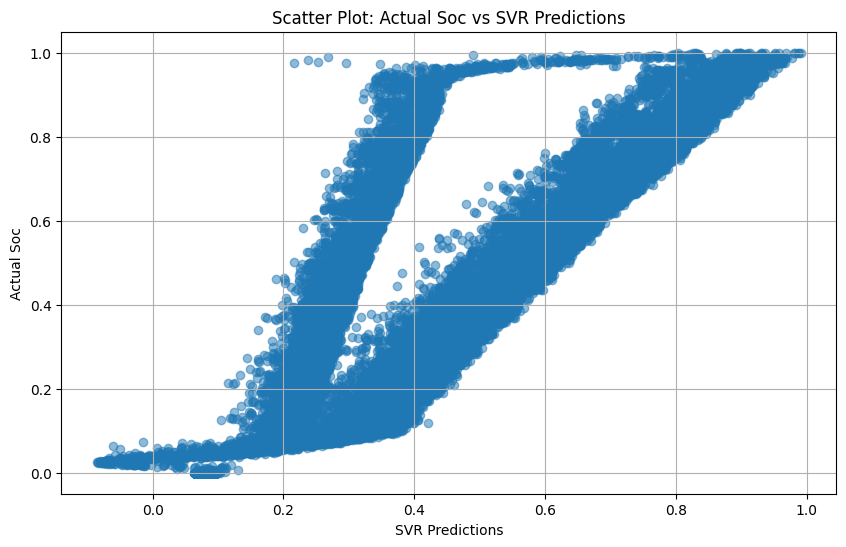

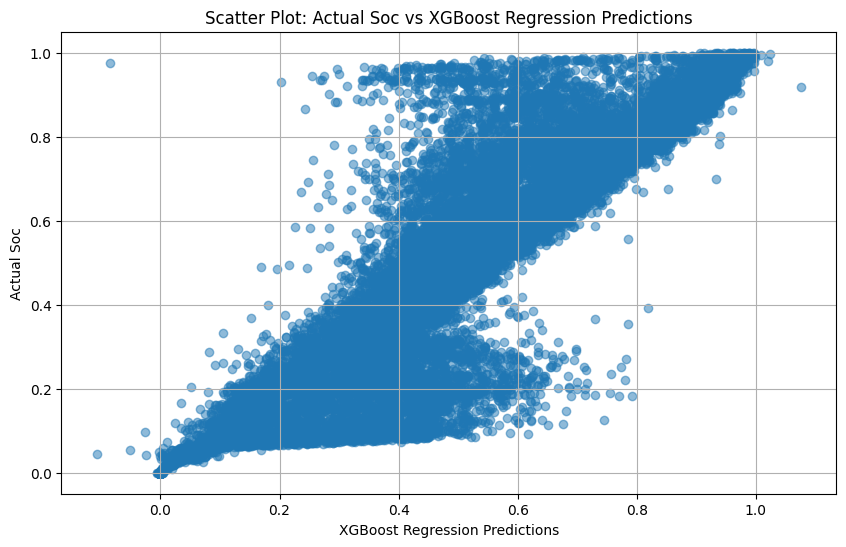

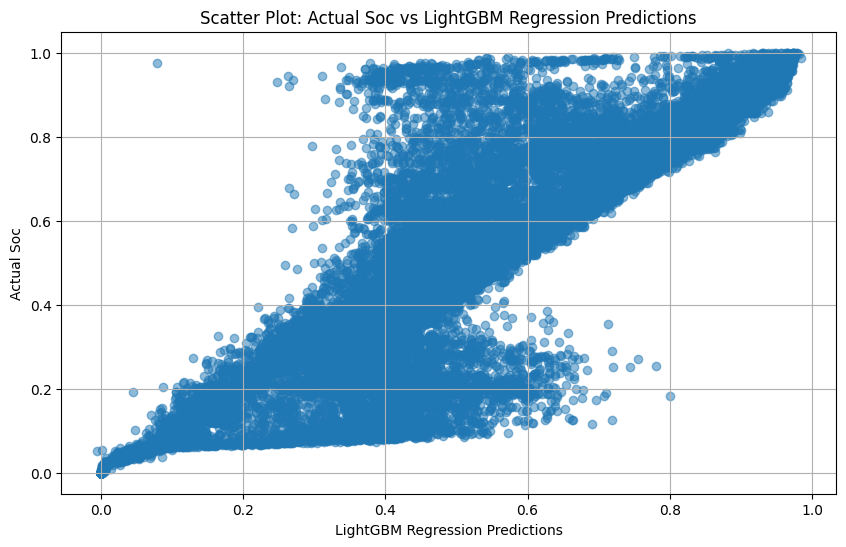

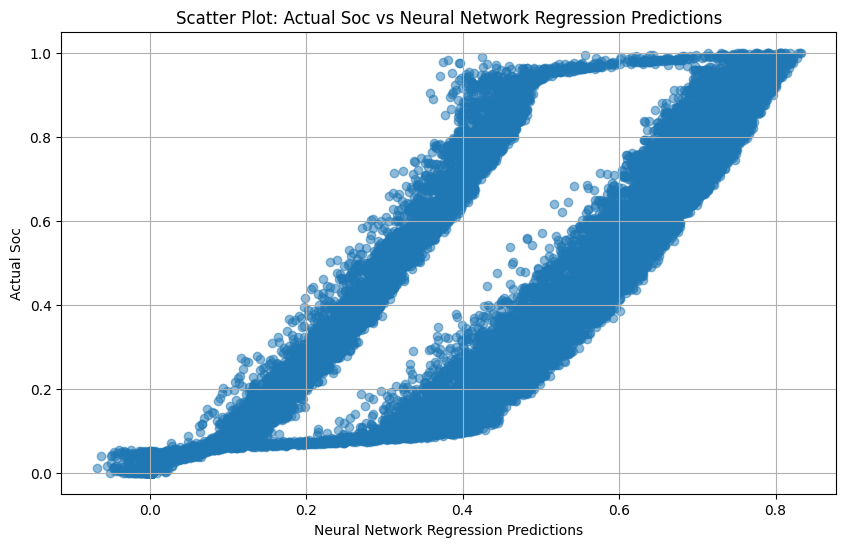

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# List of prediction columns to compare with 'Actual Soc'
prediction_columns = [
    'Linear Regression Predictions',
    'Decision Tree Regression Predictions',
    'Random Forest Regression Predictions',
    'SVR Predictions',
    'XGBoost Regression Predictions',
    'LightGBM Regression Predictions',
    'Neural Network Regression Predictions'
]

# Create scatter plots for each prediction column
for column in prediction_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(soc_df[column], soc_df['Actual Soc'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Actual Soc')
    plt.title(f'Scatter Plot: Actual Soc vs {column}')
    plt.grid(True)
    plt.show()


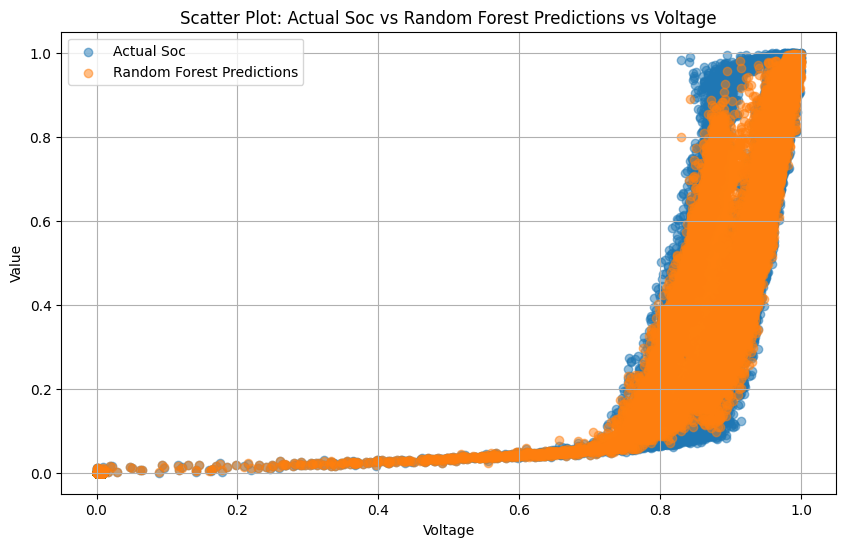

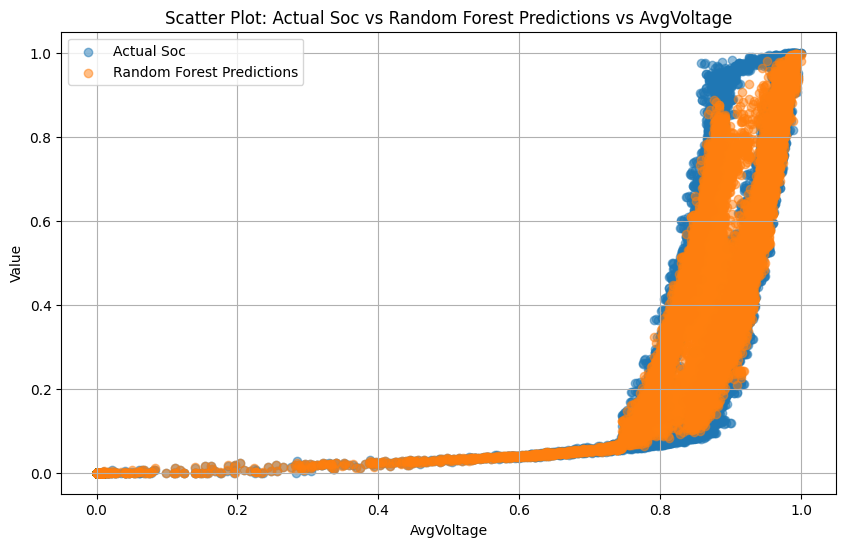

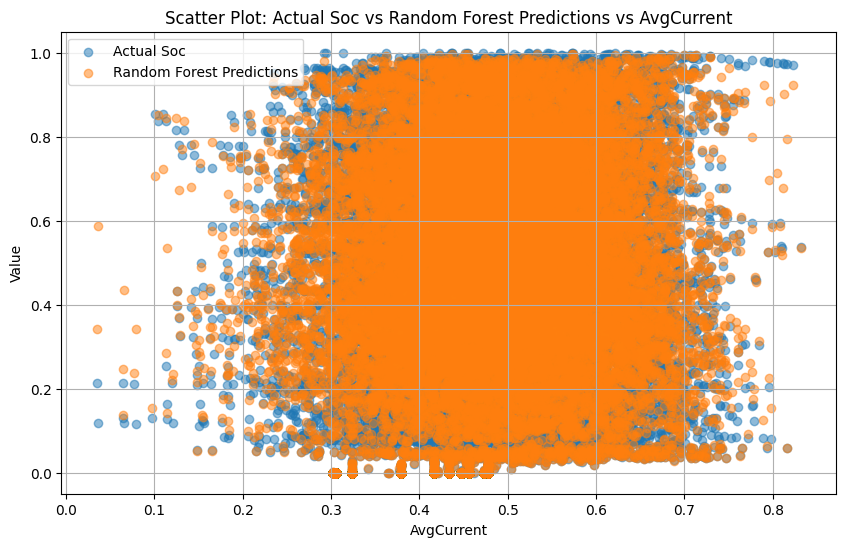

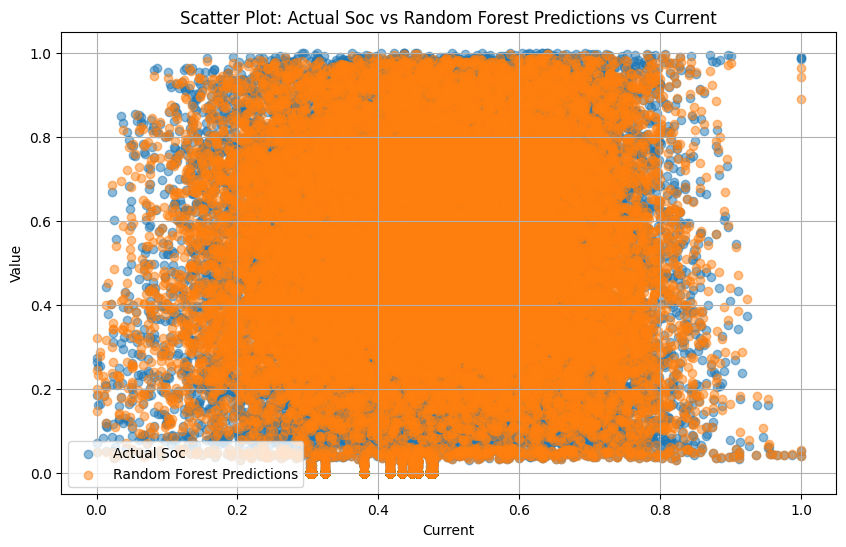

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# List of columns to compare with 'Actual Soc' and 'Random Forest Regression Predictions'
columns_to_compare = ['Voltage', 'AvgVoltage', 'AvgCurrent', 'Current']

# Create scatter plots for each comparison
for column in columns_to_compare:
    plt.figure(figsize=(10, 6))
    plt.scatter(soc_df[column], soc_df['Actual Soc'], label='Actual Soc', alpha=0.5)
    plt.scatter(soc_df[column], soc_df['Random Forest Regression Predictions'], label='Random Forest Predictions', alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Scatter Plot: Actual Soc vs Random Forest Predictions vs {column}')
    plt.legend()
    plt.grid(True)
    plt.show()


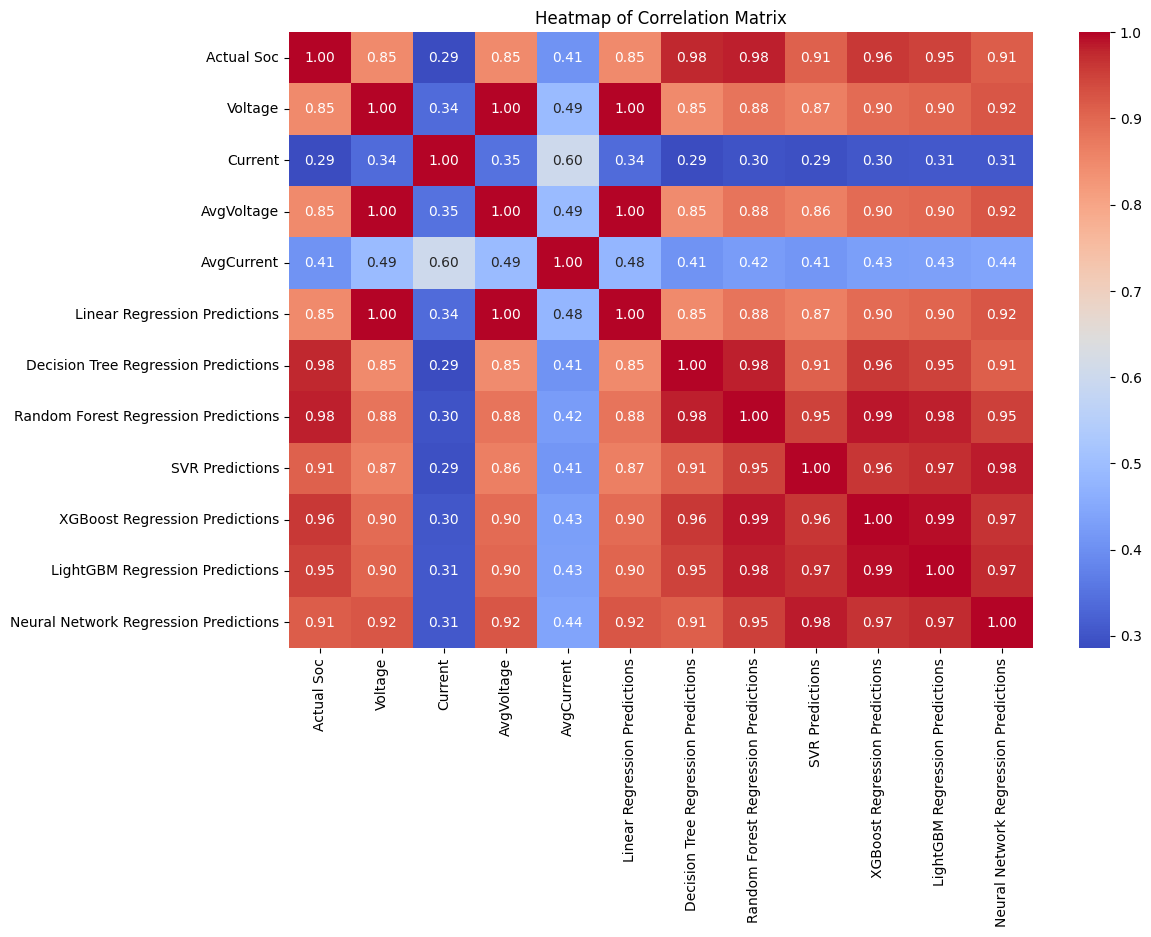

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# Create a heatmap of the correlation matrix
correlation_matrix = soc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [ ]:
# ALSO THE HEAT MAP SUGGESTS THAT THE ACTUAL SOC THAT IS THE MEASURED STATE OF CHARGE IS MOST DEPENDENT ON VOLTAGE & AVGVOLTAGE WITH 85 RATIO.

In [ ]:
# THIS HEAT MAP SUGGESTS THE DEPENDENCY RATE OR FOR NEAREST VALUES--
# ACTUAL SOC vs all PREDICTIONS:
#         85     LINEAR 
#         98     DECISION TREE
#         98     RANDOM FOREST     NEAREST/MOST ACCURATE PREDICTIONS
#         91     SVR
#         96     XGBOOST
#         95     LIGHTGBM
#         91     NEURAL NETWORK

In [22]:
# AvgVoltage-highest dependency
import pandas as pd
import plotly.express as px

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# Create a 3D scatter plot for Actual Soc, Random Forest Regression Predictions, and AvgVoltage
fig = px.scatter_3d(soc_df, x='Actual Soc', y='Random Forest Regression Predictions', z='AvgVoltage',
                    labels={'x': 'Actual Soc', 'y': 'Random Forest Predictions', 'z': 'AvgVoltage'},
                    title='3D Scatter Plot: Actual Soc vs Random Forest Predictions vs AvgVoltage')

# Show the plot
fig.show()

In [23]:
# Current-- lowest dependency
import pandas as pd
import plotly.express as px

# Load your DataFrame (soc_df)
# soc_df = pd.read_csv('your_data.csv')

# Create a 3D scatter plot for Actual Soc, Random Forest Regression Predictions, and AvgVoltage
fig = px.scatter_3d(soc_df, x='Actual Soc', y='Random Forest Regression Predictions', z='Current',
                    labels={'x': 'Actual Soc', 'y': 'Random Forest Predictions', 'z': 'Current'},
                    title='3D Scatter Plot: Actual Soc vs Random Forest Predictions vs Current')

# Show the plot
fig.show()
